In [1]:
# Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale
from prophet import Prophet



In [2]:
# Read in cleaned data

clean_data_df = pd.read_csv('clean_files_output_ey.csv')
#clean_data_df.dtypes

clean_data_df.head()

,Unnamed: 0,title,rating,genre,year,release_date,budget,director,star,gross,votes,runtime,company,license,is_not_numeric
0,2,#1 Serial Killer,5.9,Horror,2013,NaN,NaN,Stanley Yung,"Jason Tobin, \nEugenia Yuan, \nTzi Ma, \nShosh...",NaN,62,87 min,NaN,Not Rated,False
1,3,#1915House,NaN,"Horror, Thriller",2018,NaN,NaN,Justin DiPego,Justin DiPego,NaN,0,55 min,NaN,NaN,False
2,5,#5,5.9,"Biography, Comedy, Fantasy",2013,NaN,NaN,Ricky Bardy,"Justin Bardy, \nRicky Bardy",NaN,13,68 min,NaN,NaN,False
3,7,#66,5.6,Action,2015,NaN,NaN,Asun Mawardi,"Ari Riski Ananda, \nErwin Bagindo, \nFandy Chr...",NaN,32,116 min,NaN,NaN,False
4,8,#69 Samskar Colony,6.5,Romance,2022,NaN,NaN,Suneel Kumar Reddy,"Ajay, \nArtnilxen, \nFm Babai, \nBadram",NaN,516,126 min,NaN,NaN,False


In [3]:
# Top 10 Movies Every 5 Years

In [3]:
# Convert release_date to datetime
clean_data_df['release_date'] = pd.to_datetime(clean_data_df['release_date'])
#clean_data_df['year'] = clean_data_df['release_date'].dt.year
clean_data_df.dtypes

Unnamed: 0                 int64
title                     object
rating                   float64
genre                     object
year                       int64
release_date      datetime64[ns]
budget                   float64
director                  object
star                      object
gross                    float64
votes                      int64
runtime                   object
company                   object
license                   object
is_not_numeric              bool
dtype: object

In [4]:
# Define function to get top 10 movies for every 5 years
def get_top_10_movies_by_period(clean_data_df, start_year, end_year):
    period_df = clean_data_df[(clean_data_df['year'] >= start_year) & (clean_data_df['year'] < end_year)]
    top_10_movies = period_df.nlargest(10, 'gross')
    return top_10_movies


In [18]:
# Define periods
periods = [(1990, 1995), (1995, 2000), (2000, 2005), (2005, 2010), (2010, 2015), (2015, 2020)]
periods

# Set locale to US English for currency formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Get top 10 movies for each period
top_movies_by_period = {}
for start_year, end_year in periods:
    top_movies_by_period[f'{start_year}-{end_year-1}'] = get_top_10_movies_by_period(clean_data_df, start_year, end_year)
    top_movies_by_period[f'{start_year}-{end_year-1}']['period'] = f'{start_year}-{end_year-1}'


In [20]:
top_movies_by_period['1990-1994']

,Unnamed: 0,title,rating,genre,year,release_date,budget,director,star,gross,votes,runtime,company,license,is_not_numeric,period
94402,307686,The Lion King,8.5,Animation,1994,NaT,45000000.0,Roger Allers,Matthew Broderick,1.083721e+09,970000,88.0,Walt Disney Pictures,G,False,1990-1994
46173,148586,Jurassic Park,8.2,Action,1993,NaT,63000000.0,Steven Spielberg,Sam Neill,1.033928e+09,894000,127.0,Universal Pictures,PG-13,False,1990-1994
33043,106085,Forrest Gump,8.8,Drama,1994,NaT,55000000.0,Robert Zemeckis,Tom Hanks,6.782261e+08,1900000,142.0,Paramount Pictures,PG-13,False,1990-1994
87571,278784,Terminator 2: Judgment Day,8.6,Action,1991,NaT,102000000.0,James Cameron,Arnold Schwarzenegger,5.208812e+08,1000000,137.0,Carolco Pictures,R,False,1990-1994
35029,112486,Ghost,NaN,Drama,1990,NaT,22000000.0,Jerry Zucker,Patrick Swayze,5.057036e+08,203000,127.0,Paramount Pictures,PG-13,False,1990-1994
5365,15063,Aladdin,6.9,Animation,1992,NaT,28000000.0,Ron Clements,Scott Weinger,5.040502e+08,382000,90.0,Walt Disney Pictures,G,False,1990-1994
39785,128692,Home Alone,7.7,Comedy,1990,NaT,18000000.0,Chris Columbus,Macaulay Culkin,4.766847e+08,501000,103.0,Hughes Entertainment,PG,False,1990-1994
71495,225780,Pretty Woman,5.0,Comedy,1990,NaT,14000000.0,Garry Marshall,Richard Gere,4.634063e+08,299000,119.0,Touchstone Pictures,R,False,1990-1994
61254,194363,Mrs. Doubtfire,NaN,Comedy,1993,NaT,25000000.0,Chris Columbus,Robin Williams,4.412862e+08,252000,125.0,Twentieth Century Fox,PG-13,False,1990-1994
11457,34104,Beauty and the Beast,7.1,Animation,1991,NaT,25000000.0,Gary Trousdale,Paige O'Hara,4.249676e+08,424000,84.0,Walt Disney Pictures,G,False,1990-1994


In [21]:
# Concatenate all top movies into one DataFrame
all_top_movies = pd.concat(top_movies_by_period.values())
all_top_movies

In [25]:

# Group by genre and period, then pivot table
genre_analysis = all_top_movies.groupby(['genre', 'period'])['gross'].sum().unstack(fill_value=0)

# Format gross as currency
for column in genre_analysis.columns:
    genre_analysis[column] = genre_analysis[column].apply(lambda x: locale.currency(x, grouping=True))
    
# Print top 10 movies by period
#for period, top_movies in top_movies_by_period.items():
#    top_movies['gross'] = top_movies['gross'].apply(lambda x: locale.currency(x, grouping=True))
#    print(f"\nTop 10 Movies from {periods}:")
#    print(top_movies[['title', 'gross', 'genre', 'period']])

In [62]:
# Genre Analysis
genre_analysis = pd.concat(top_movies_by_period.values())
genre_analysis = genre_analysis.groupby('genre')['gross'].sum().sort_values(ascending=False).reset_index()

genre_analysis
#Print genre analysis
#print("\nGenre Analysis based on Gross Earnings from Top Movies:")
#print(genre_analysis)

,genre,gross


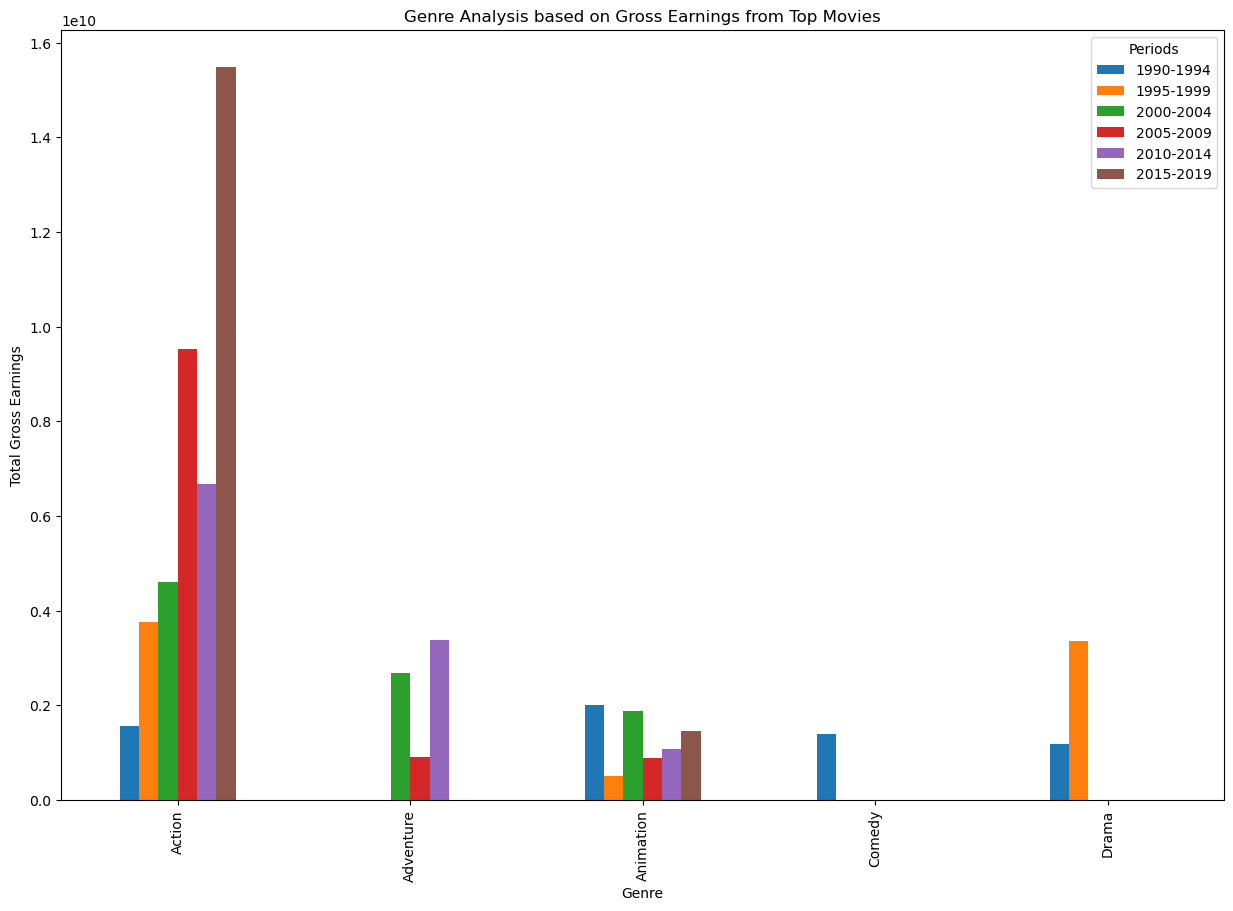

In [27]:
# Plot genre analysis
genre_analysis_numeric = all_top_movies.groupby(['genre', 'period'])['gross'].sum().unstack(fill_value=0)

genre_analysis_numeric.plot(kind='bar', figsize=(15, 10))
plt.title('Genre Analysis based on Gross Earnings from Top Movies')
plt.xlabel('Genre')
plt.ylabel('Total Gross Earnings')
plt.legend(title='Periods')
plt.show()

In [10]:
# Top 10 movie in sales: ROI (sales - budget) + factors: director, star, genre, license, release_date  - Eliza


In [11]:
# Data cleaning 
clean_data_df = clean_data_df.dropna(subset=['gross', 'budget'])


In [12]:
# Calculate ROI
clean_data_df['ROI'] = (clean_data_df['gross'] - clean_data_df['budget']) / clean_data_df['budget']
#clean_data_df['ROI'] = (clean_data_df['gross'] - (clean_data_df['budget']) / clean_data_df['budget'])

clean_data_df

,Unnamed: 0,title,rating,genre,year,release_date,budget,director,star,gross,votes,runtime,company,license,is_not_numeric,ROI
200,528,10 Cloverfield Lane,7.2,Action,NaN,NaT,15000000.0,Dan Trachtenberg,John Goodman,110216998.0,300000,103.0,Paramount Pictures,PG-13,False,6.347800
227,598,10 Things I Hate About You,7.3,Comedy,NaN,NaT,30000000.0,Gil Junger,Heath Ledger,53478579.0,309000,97.0,Touchstone Pictures,PG-13,False,0.782619
232,609,"10,000 BC",5.1,Action,NaN,NaT,105000000.0,Roland Emmerich,Camilla Belle,269784201.0,127000,109.0,Warner Bros.,PG-13,False,1.569373
282,761,101 Dalmatians,5.7,Adventure,NaN,NaT,75000000.0,Stephen Herek,Glenn Close,320689294.0,105000,103.0,Walt Disney Pictures,G,False,3.275857
292,775,102 Dalmatians,4.8,Adventure,NaN,NaT,85000000.0,Kevin Lima,Glenn Close,183611771.0,36000,100.0,Cruella Productions,G,False,1.160138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111233,370284,eXistenZ,6.8,Horror,NaN,NaT,15000000.0,David Cronenberg,Jude Law,2856712.0,96000,97.0,Dimension Films,R,False,-0.809553
111284,370404,xXx,5.8,Action,NaN,NaT,70000000.0,Rob Cohen,Vin Diesel,277448382.0,175000,124.0,Revolution Studios,PG-13,False,2.963548
111285,370407,xXx: Return of Xander Cage,5.2,Action,NaN,NaT,85000000.0,D.J. Caruso,Vin Diesel,346118277.0,88000,107.0,Paramount Pictures,PG-13,False,3.071980
111286,370410,xXx: State of the Union,4.4,Action,NaN,NaT,113000000.0,Lee Tamahori,Ice Cube,71022693.0,68000,101.0,Columbia Pictures,PG-13,False,-0.371481


In [13]:
# Sort by ROI and select top 10
top_roi_movies = clean_data_df.sort_values('ROI', ascending=False).head(10)
top_roi_movies = top_roi_movies.nlargest(10, 'ROI')
top_roi_movies


,Unnamed: 0,title,rating,genre,year,release_date,budget,director,star,gross,votes,runtime,company,license,is_not_numeric,ROI
68482,216609,Paranormal Activity,6.3,Horror,NaN,NaT,15000.0,Oren Peli,Katie Featherston,193355800.0,225000,86.0,Solana Films,R,False,12889.386667
89053,284616,The Blair Witch Project,6.5,Horror,NaN,NaT,60000.0,Daniel Myrick,Heather Donahue,248639099.0,239000,81.0,Haxan Films,R,False,4142.984983
91941,297021,The Gallows,4.2,Horror,NaN,NaT,100000.0,Travis Cluff,Reese Mishler,42964410.0,20000,81.0,New Line Cinema,R,False,428.644100
28446,90549,El Mariachi,6.8,Action,NaN,NaT,7000.0,Robert Rodriguez,Carlos Gallardo,2040920.0,64000,81.0,Columbia Pictures,R,False,290.560000
66433,209975,Once,6.2,Drama,NaN,NaT,150000.0,John Carney,Glen Hansard,20936722.0,112000,86.0,Bórd Scannán na hÉireann,R,False,138.578147
19413,59827,Clerks,NaN,Comedy,NaN,NaT,27000.0,Kevin Smith,Brian O'Halloran,3151130.0,214000,92.0,View Askew Productions,R,False,115.708519
63060,199446,Napoleon Dynamite,NaN,Comedy,NaN,NaT,400000.0,Jared Hess,Jon Heder,46138887.0,204000,96.0,Fox Searchlight Pictures,PG,False,114.347217
42819,137769,In the Company of Men,NaN,Comedy,NaN,NaT,25000.0,Neil LaBute,Aaron Eckhart,2804473.0,13000,97.0,Alliance Atlantis Communications,R,False,111.178920
47794,153088,Keeping Mum,6.8,Comedy,NaN,NaT,169000.0,Niall Johnson,Rowan Atkinson,18586834.0,34000,99.0,Summit Entertainment,R,False,108.981266
66940,211600,Open Water,5.8,Adventure,NaN,NaT,500000.0,Chris Kentis,Blanchard Ryan,54683487.0,52000,79.0,Plunge Pictures LLC,R,False,108.366974


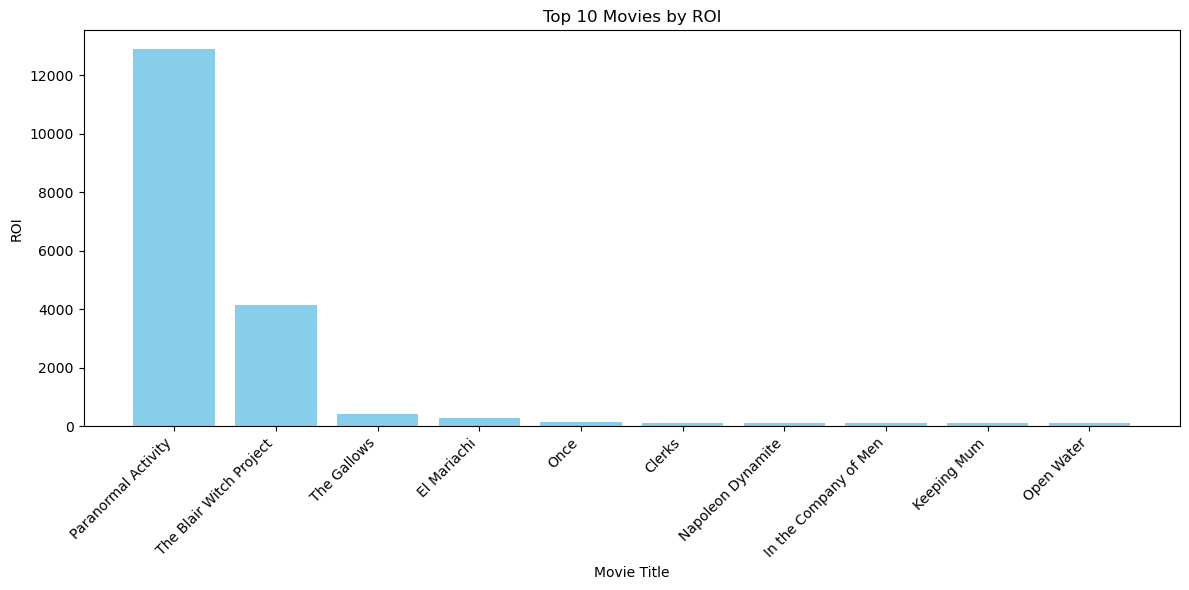

In [14]:
# Bar Plot: Top 10 Movies by ROI (To compare of the financial performance of the movies)
plt.figure(figsize=(12, 6)) 
plt.bar(top_roi_movies['title'], top_roi_movies['ROI'], color='skyblue')
plt.title('Top 10 Movies by ROI')
plt.xlabel('Movie Title')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [15]:
# Identify factors for Top 10 movie in ROI: director, star, genre, license, release_date
top_roi_movies = top_roi_movies[['title', 'ROI', 'gross', 'director', 'star', 'genre', 'license', 'release_date']]

top_roi_movies


,title,ROI,gross,director,star,genre,license,release_date
68482,Paranormal Activity,12889.386667,193355800.0,Oren Peli,Katie Featherston,Horror,R,NaT
89053,The Blair Witch Project,4142.984983,248639099.0,Daniel Myrick,Heather Donahue,Horror,R,NaT
91941,The Gallows,428.644100,42964410.0,Travis Cluff,Reese Mishler,Horror,R,NaT
28446,El Mariachi,290.560000,2040920.0,Robert Rodriguez,Carlos Gallardo,Action,R,NaT
66433,Once,138.578147,20936722.0,John Carney,Glen Hansard,Drama,R,NaT
19413,Clerks,115.708519,3151130.0,Kevin Smith,Brian O'Halloran,Comedy,R,NaT
63060,Napoleon Dynamite,114.347217,46138887.0,Jared Hess,Jon Heder,Comedy,PG,NaT
42819,In the Company of Men,111.178920,2804473.0,Neil LaBute,Aaron Eckhart,Comedy,R,NaT
47794,Keeping Mum,108.981266,18586834.0,Niall Johnson,Rowan Atkinson,Comedy,R,NaT
66940,Open Water,108.366974,54683487.0,Chris Kentis,Blanchard Ryan,Adventure,R,NaT


/var/folders/62/f2x4shss4kq25jc_zwqwlh740000gn/T/ipykernel_30483/1175864018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_roi_movies['release_date'] = pd.to_datetime(top_roi_movies['release_date'])


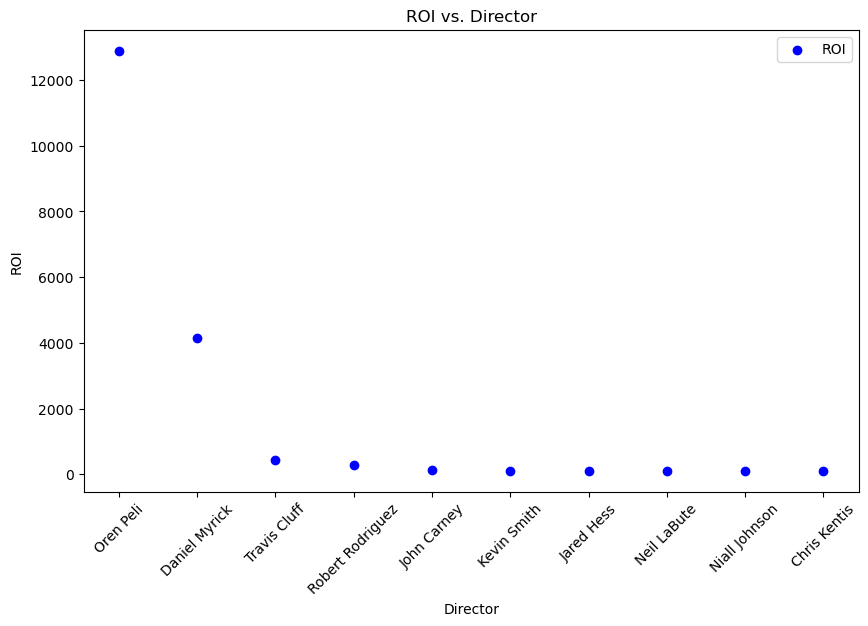

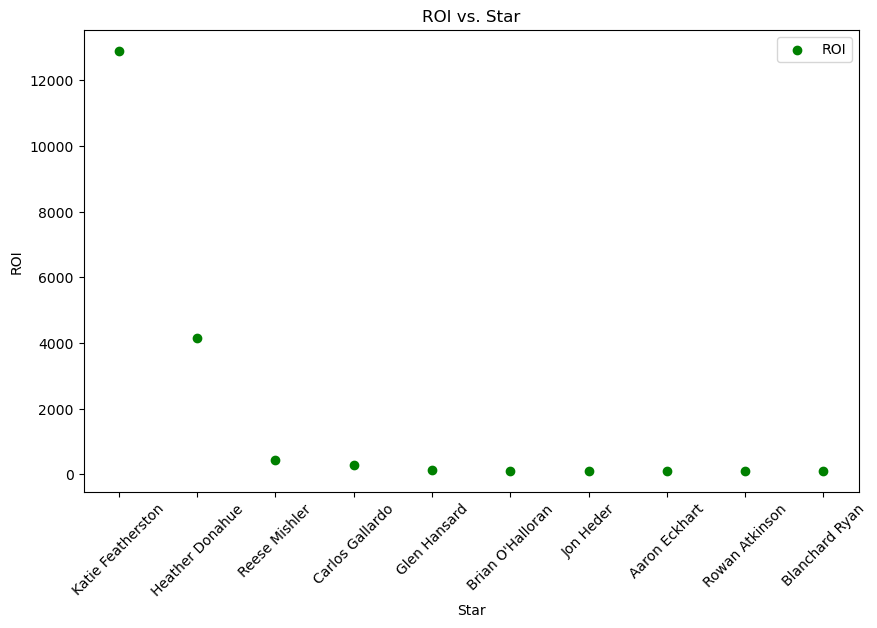

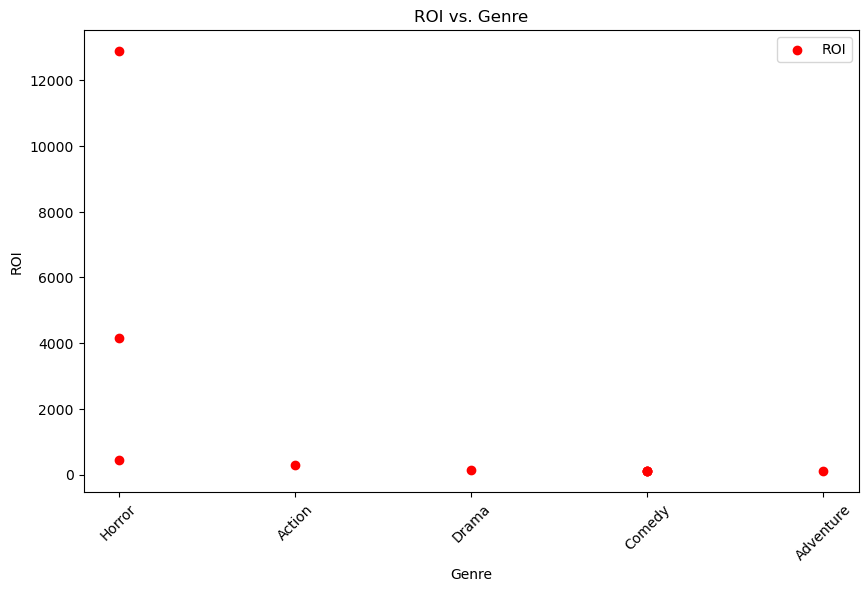

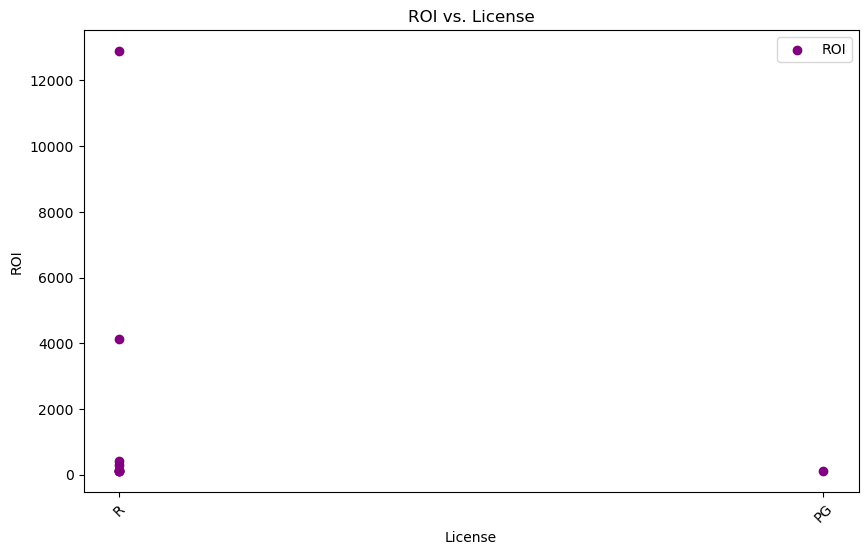

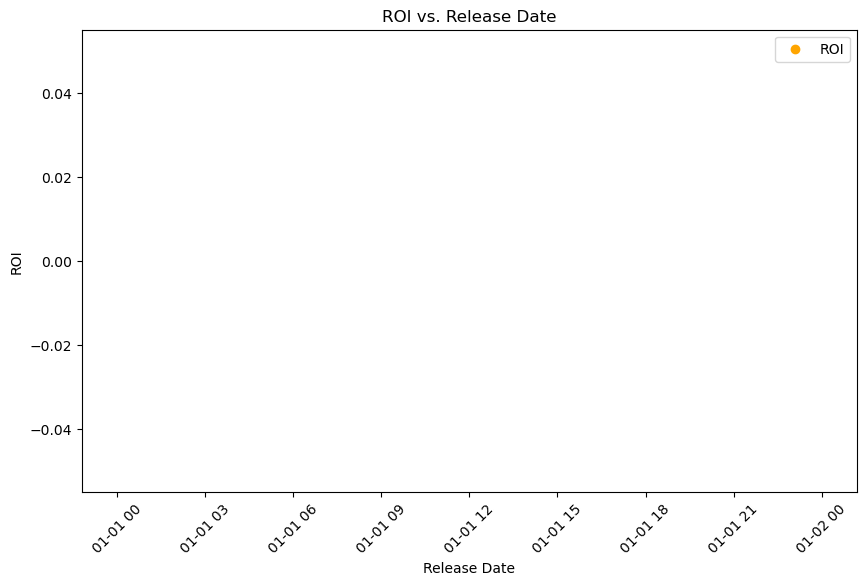

In [16]:
# Convert Release_Date to datetime
top_roi_movies['release_date'] = pd.to_datetime(top_roi_movies['release_date'])

# Plot for Director
plt.figure(figsize=(10, 6))
plt.scatter(top_roi_movies['director'], top_roi_movies['ROI'], c='blue', label='ROI')
plt.title('ROI vs. Director')
plt.xlabel('Director')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot for Star
plt.figure(figsize=(10, 6))
plt.scatter(top_roi_movies['star'], top_roi_movies['ROI'], c='green', label='ROI')
plt.title('ROI vs. Star')
plt.xlabel('Star')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot for Genre
plt.figure(figsize=(10, 6))
plt.scatter(top_roi_movies['genre'], top_roi_movies['ROI'], c='red', label='ROI')
plt.title('ROI vs. Genre')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot for License
plt.figure(figsize=(10, 6))
plt.scatter(top_roi_movies['license'], top_roi_movies['ROI'], c='purple', label='ROI')
plt.title('ROI vs. License')
plt.xlabel('License')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot for Release Date
plt.figure(figsize=(10, 6))
plt.scatter(top_roi_movies['release_date'], top_roi_movies['ROI'], c='orange', label='ROI')
plt.title('ROI vs. Release Date')
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.legend()
plt.show()



In [17]:
# Top 10 Movies by ROI findings - Based on ROI, R rated and horror films did the best
# Data for Release Date was incomplete, was not able to capture data


In [ ]:
# Prediction: ROI of horror and comedy over time

In [ ]:
# Recommendation: For maximizing viewership, action films are the most popular choice. However, for achieving the highest ROI, consider producing horror or comedy films.